In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from matplotlib import ticker

from RashbaJunction import RashbaJunction, RashbaJunction
from RashbaJunction.utilities import adjuct_Tick, make_grid, error_decorator


ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/tesi/3_Transport_poroperties_RNW/py/"
BASE_PATH_DIRAC_PARADOX = "plots/tesi/4_Dirac_paradox/"
# BASE_PATH_SLIDE = "plots/tesi/Slide/"
BASE_PATH_SLIDE = "/Users/l/Google Drive/polito_/tesi/Text/vesions/Slide/assets/"
print(BASE_PATH)
print(BASE_PATH_DIRAC_PARADOX)
print(BASE_PATH_SLIDE)

k_so 6274572.777578376
x' 3.137286388789188
plots/tesi/3_Transport_poroperties_RNW/py/
plots/tesi/4_Dirac_paradox/
/Users/l/Google Drive/polito_/tesi/Text/vesions/Slide/assets/


In [2]:
def expansion(x):
    return x**2/(1 + (x/2)**2)**2

def expansion2(x):
    return 16*np.pi**2*x/E_l/(4 + np.pi**2*x/E_l)**2

# Plot set up

In [3]:
font = {'family': "Times New Roman", "size": 25}

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# y_label = [r"$$ \frac{G}{G_0}$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# x_label = r"$$\frac{E}{E_Z}$$"
y_label = [r"$$ G / G_0$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
x_label = r"$$E / E_Z$$"

y_label_pos = [(-.02, 1.03), (-.09, 1)]

legend_font_size = 25

region_lbl = ["(a)", "(b)", "(c)"]

# Single interface case



## Figure 1

### T vs E at constant $E_Z$ and $E_{so,R} = E_Z/4$ with parameters $2E_{so,L}/E_Z=0.2, 0.7, 3$

In [13]:
alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]

# EZ_profile = [.5, .5]


junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[0] = par
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef

# par: E_so/E_z
alpha_l = np.array([0.2, 0.7, 3])
# x: E/E_z
enn = np.arange(-0.99, 1.5, 0.0011)

trasmission_coeff_total = make_grid(enn, alpha_l, [g])

plots/tesi/3_Transport_poroperties_RNW/py/fig_1a.pdf


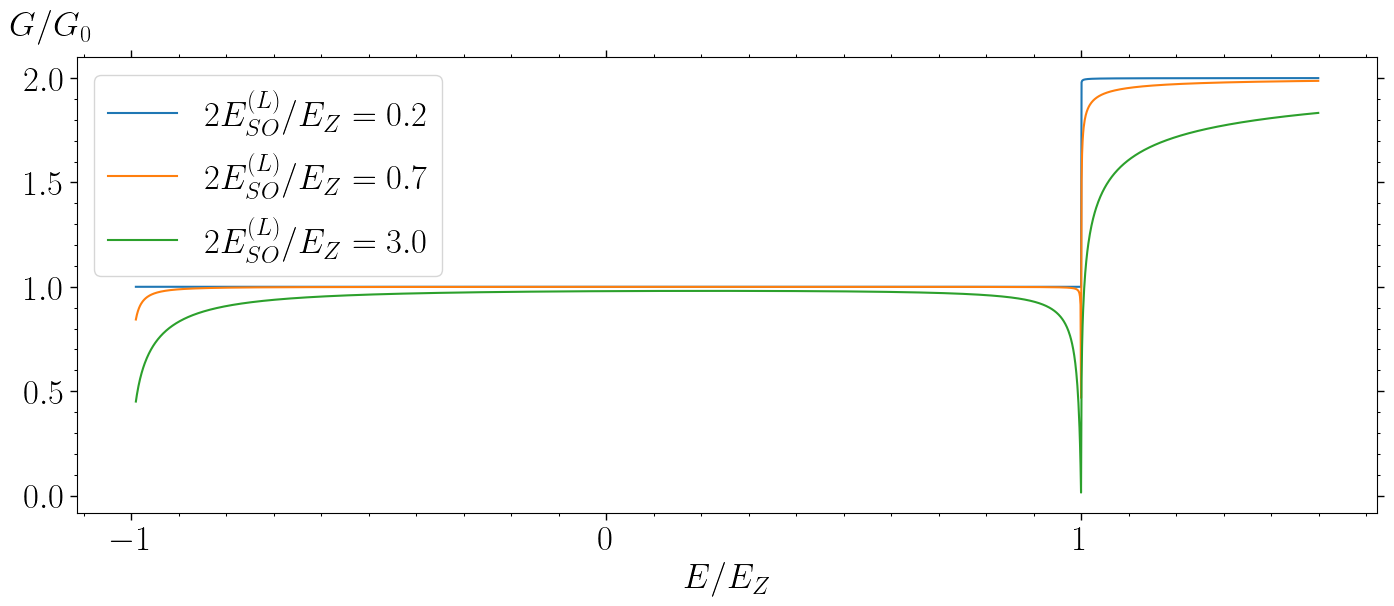

In [14]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

line_label = r"$$ E_{{SO}}^{{(L)}} = {0} E_{{SO}}^{{(R)}} $$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():

    axs.plot(enn, trasmission_coeff_total[k][0],
                   label=fr"$$ 2E_{{SO}}^{{(L)}}/E_Z = {k}$$")


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


# fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=font["size"], y = 1.01)

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"fig_1a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
      
plt.show()

### T vs E at constant $E_Z$ and $E_{so,R} = E_Z/4$ with parameters $2E_{so,L}/E_Z=-0.2, -0.7, -3$

In [19]:
alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]


junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[0] = par
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef

# par: E_so/E_z
alpha_l = -np.array([0.2, 0.7, 3])
# x: E/E_z
enn = np.arange(-0.99, 1.5, 0.0011)
trasmission_coeff_total = make_grid(enn, alpha_l, [g])

plots/tesi/3_Transport_poroperties_RNW/py/fig_1b.pdf


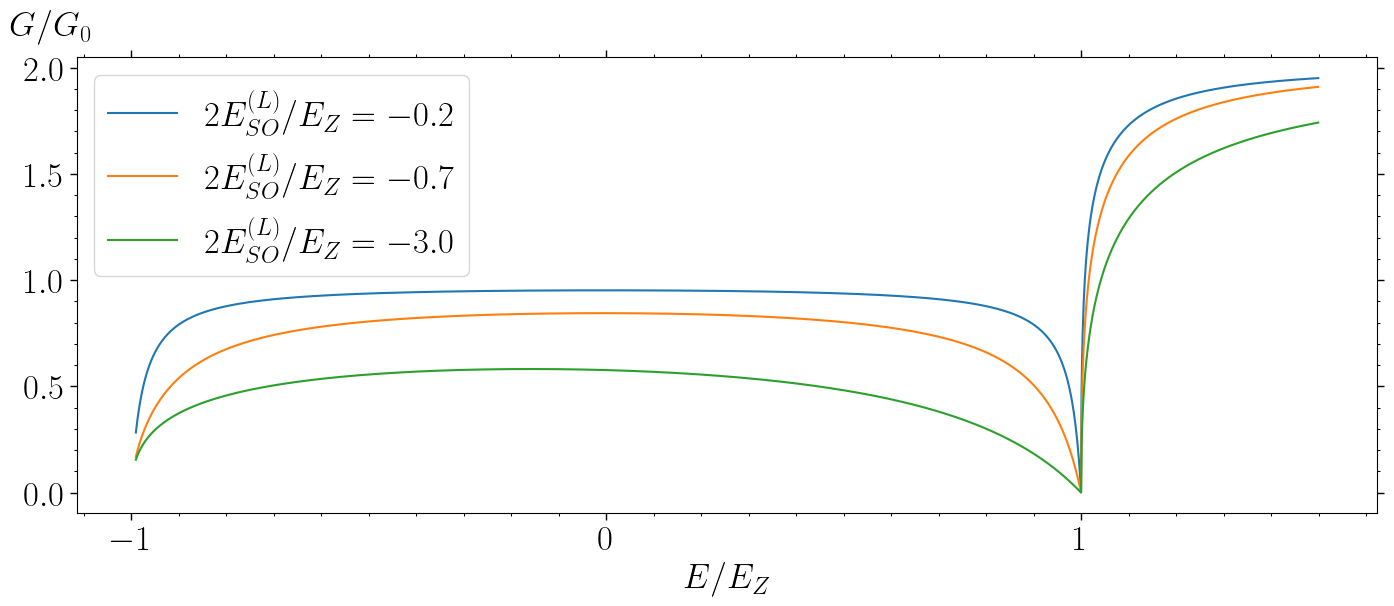

In [20]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


line_label = r"$$ E_{{SO}}^{{(L)}} = {0} E_{{SO}}^{{(R)}} $$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():

    axs.plot(enn, trasmission_coeff_total[k][0],
                   label=fr"$$ 2E_{{SO}}^{{(L)}}/E_Z = {k}$$")


# y_label_pos = [(-.02, 1), (-.09, 1)]

axs.legend(fontsize = legend_font_size)
# axs[i, j].grid(True)#which='both')
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# fig.suptitle(fr"$$E_{{so, R}} = {alp_r} h_\perp$$", fontsize=font["size"], y = 1.01)

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"fig_1b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

### Analysis of the single interface case

Compute and print the wave function coefficient and the orientation of the Spinor($\theta(k)$) in the case of single interface.

In [25]:
from RashbaJunction.RashbaJunction_0_4 import WaveFunction

alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]
ee = 0

junction = WaveFunction()
junction2 = RashbaJunction([x_profile, Eso_profile])
alpha_l = np.array([0.2, 0.7, 3, -0.2, -0.7, -3])/2

junction.E_so = junction2[1]
junction.prepare_rashba_WF(0, ee)    
r = 0
print(junction.sgn_k[r])
thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
r = 1
print(junction.sgn_k[r])
thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
kappa = 3
theta3 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa] * np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)

print(thetap, thetam, theta3)


for i in alpha_l:
    junction2[0] = i
    S = junction2.get_scattering_matrix(ee)
    
    junction.E_so = junction2[0]
    junction.prepare_rashba_WF(0, ee)
    
    r = 0
    thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    r = 1
    thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    
    
    print(f"For $2 E_{{SO}}^{{(L)}}/ E_Z = {2*i}$; $\\theta(+k^{{(L)}}(0)) = {thetap} \pi$; $\\theta(-k^{{(L)}}(0)) = {thetam} \pi$")
    print("\\begin{align}")
    print("\t\\left| \hat{b}_{1, E}^{(L)} \\right| &= "+f"{np.round(np.linalg.norm(S.C[0,0]), 6)}\\\ ")
    print("\t\\left| \hat{b}_{1, E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[1,0]), 6)}\\\ ")
    
    kappa = 2
    theta2 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa]* np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)
    print("\t\\left| \hat{\\alpha}_{E}^{(L)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[2,0]), 6)}\\quad \\varphi(+\\kappa^{{(L)}}(0)) = {theta2} \pi\\\ ")
    
    print("\t\\left| \hat{\\alpha}_{E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[3,0]), 6)}")
    print("\\end{align}")
#     print("#"*10)

1.0
-1.0
0.212 0.788 -0.288
For $2 E_{SO}^{(L)}/ E_Z = 0.2$; $\theta(+k^{(L)}(0)) = 0.306 \pi$; $\theta(-k^{(L)}(0)) = 0.694 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.00795\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.024919\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.088532\quad \varphi(+\kappa^{(L)}(0)) = 0.194 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.091278
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 0.7$; $\theta(+k^{(L)}(0)) = 0.174 \pi$; $\theta(-k^{(L)}(0)) = 0.826 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.001803\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.001039\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.042368\quad \varphi(+\kappa^{(L)}(0)) = 0.326 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.042488
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 3.0$; $\theta(+k^{(L)}(0)) = 0.052 \pi$; $\theta(-k^{(L)}(0)) = 0.948 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.071669\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.200781\\ 


In [418]:
alp_r = 1/4-1E-4
Eso_profile = [-1, alp_r]
x_profile = [0]
ee = -0.95

junction = RashbaJunction([x_profile, Eso_profile])
alpha_l = np.array([0.2, 0.7, 3, -0.2, -0.7, -3])/2

junction.E_so = junction[1]
junction.prepare_rashba_WF(0, ee)    
r = 0
thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
r = 1
thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
kappa = 3
theta3 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa][1] * np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)


print(f"\\begin{{align}}\n\
        &\\theta(+k^{{(R)}}({ee})) = {thetap} \\pi\\\ \n\
        &\\theta(-k^{{(R)}}({ee})) = {thetam} \\pi\\\ \n\
        &\\varphi(-\kappa_+^{{(R)}}({ee})) = {theta3} \\pi\n\
\\end{{align}}"
)

for i in alpha_l:
    junction[0] = i
    S = junction.get_scattering_matrix(ee)
    
    junction.E_so = junction[0]
    junction.prepare_rashba_WF(0, ee)
    
    r = 0
    thetap = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    r = 1
    thetam = np.round(np.arccos(2 * junction.sgn_alpha * junction.sgn_k[r][1]* np.sqrt(junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so/(1+4*junction.E_0(ee, junction.l[r], junction.mod[r])*junction.E_so)))/np.pi, 3)
    
    
    print(f"For $2 E_{{SO}}^{{(L)}}/ E_Z = {2*i}$; $\\theta(+k^{{(L)}}({ee})) = {thetap} \pi$; $\\theta(-k^{{(L)}}({ee})) = {thetam} \pi$")
    print("\\begin{align}")
    print("\t\\left| \hat{b}_{1, E}^{(L)} \\right| &= "+f"{np.round(np.linalg.norm(S.C[0,0]), 6)}\\\ ")
    print("\t\\left| \hat{b}_{1, E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[1,0]), 6)}\\\ ")
    
    kappa = 2
    theta2 = np.round(
        np.arctan(2 * junction.sgn_alpha * junction.sgn_k[kappa][1]* np.sqrt(junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so/(1 - 4*junction.E_0(ee, junction.l[kappa], junction.mod[kappa])*junction.E_so)))/np.pi, 3)
    print("\t\\left| \hat{\\alpha}_{E}^{(L)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[2,0]), 6)}\\quad \\varphi(+\\kappa^{{(L)}}({ee})) = {theta2} \pi\\\ ")
    
    print("\t\\left| \hat{\\alpha}_{E}^{(R)}\\right| &= "+f"{np.round(np.linalg.norm(S.C[3,0]), 6)}")
    print("\\end{align}")
#     print("#"*10)

\begin{align}
        &\theta(+k^{(R)}(-0.95)) = 0.404 \pi\\ 
        &\theta(-k^{(R)}(-0.95)) = 0.596 \pi\\ 
        &\varphi(-\kappa_+^{(R)}(-0.95)) = -0.485 \pi
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 0.2$; $\theta(+k^{(L)}(-0.95)) = 0.45 \pi$; $\theta(-k^{(L)}(-0.95)) = 0.55 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.039057\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 1.106603\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.088927\quad \varphi(+\kappa^{(L)}(-0.95)) = 0.29 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.11714
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 0.7$; $\theta(+k^{(L)}(-0.95)) = 0.363 \pi$; $\theta(-k^{(L)}(-0.95)) = 0.637 \pi$
\begin{align}
	\left| \hat{b}_{1, E}^{(L)} \right| &= 0.014192\\ 
	\left| \hat{b}_{1, E}^{(R)}\right| &= 0.928162\\ 
	\left| \hat{\alpha}_{E}^{(L)}\right| &= 0.078784\quad \varphi(+\kappa^{(L)}(-0.95)) = 0.403 \pi\\ 
	\left| \hat{\alpha}_{E}^{(R)}\right| &= 0.059709
\end{align}
For $2 E_{SO}^{(L)}/ E_Z = 3.0$; $\theta(+k^{(L)}(

### Wavefunction

In [27]:
ee = 0

alp_r = 1/4-1E-4
# profile: (E_so,l/E_z; E_so,R/E_z)
Eso_profile = [10, -10]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])
S = junction.get_scattering_matrix(ee)

def total_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.delegate.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C[:2,:], np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C[2:, :], np.array(a))[0]*wf[:, 2]
        
        # print wave function coefficients 
#         if np.isclose(x, 0, atol = 1e-3):
#             print("left")
#             print(f"|r| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[0])}")
#             print(f"|pho| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            
    elif x > junction.interface[0]:
        junction.delegate.E_so = junction[1]    
        wf = junction.get_WF(x, E)
        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C[:2,:], np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C[2:, :], np.array(a))[1]*wf[:, 3]
        
        # print wave function coefficients 
#         if np.isclose(x, 0, atol = 1e-3):
#             print("rigth")
#             print(f"|t| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[1])}")
#             print(f"|gamma| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
    return injected + reflected + evanescent

def evanescent_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.delegate.E_so = junction[0]
        wf = junction.get_WF(x, E)
        evanescent = np.dot(S.C[2:, :], np.array(a))[0]*wf[:, 2]
        # print wave function coefficients 
        if np.isclose(x, 0, atol = 1e-3):
            print(wf[:, 2])
            print(evanescent/np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0]))
            print(f"|pho| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            print(np.angle(np.dot(S.C[2:,:], np.array(a))[0])/np.pi)
            
            
    elif x > junction.interface[0]:
        junction.delegate.E_so = junction[1]    
        wf = junction.get_WF(x, E)
        evanescent = np.dot(S.C[2:, :], np.array(a))[1]*wf[:, 3]
        # print wave function coefficients 
        if np.isclose(x, 0, atol = 1e-3):
            print("#"*10)
            print(wf[:, 3])
            print(evanescent/np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1]))
            print(f"|gamma| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
            print(np.angle(np.dot(S.C[2:,:], np.array(a))[1])/np.pi)
            

    return evanescent
    

    
real_1 = []
imag_1 = []

real_2 = []
imag_2 = []

ev_real_1 = []
ev_imag_1 = []

ev_real_2 = []
ev_imag_2 = []

# k_z*x
x_range = np.arange(-5, 5, 0.001)
for xx in x_range:
    r = total_WF(xx, ee)
    real_1.append(r[0].real)
    real_2.append(r[1].real)
    
    imag_1.append(r[0].imag)
    imag_2.append(r[1].imag)
    
    r2 = evanescent_WF(xx, ee)
    ev_real_1.append(r2[0].real)
    ev_real_2.append(r2[1].real)
    
    ev_imag_1.append(r2[0].imag)
    ev_imag_2.append(r2[1].imag)
    

[-0.01766384-0.70677433j  0.70699502+0.j        ]
[-0.06155986-0.70430984j  0.70562801-0.04394389j]
|pho| 0.07031584820860887
-0.019797588111601771443
##########
[-0.01766663-0.70688605j  0.70710678+0.j        ]
[0.70661693-0.02631566j 0.00865305+0.70705383j]
|gamma| 1.4080737630634743
0.4961046631447982304


plots/tesi/3_Transport_poroperties_RNW/py/wavefuncton_Dirac_paradox_single_interface.pdf


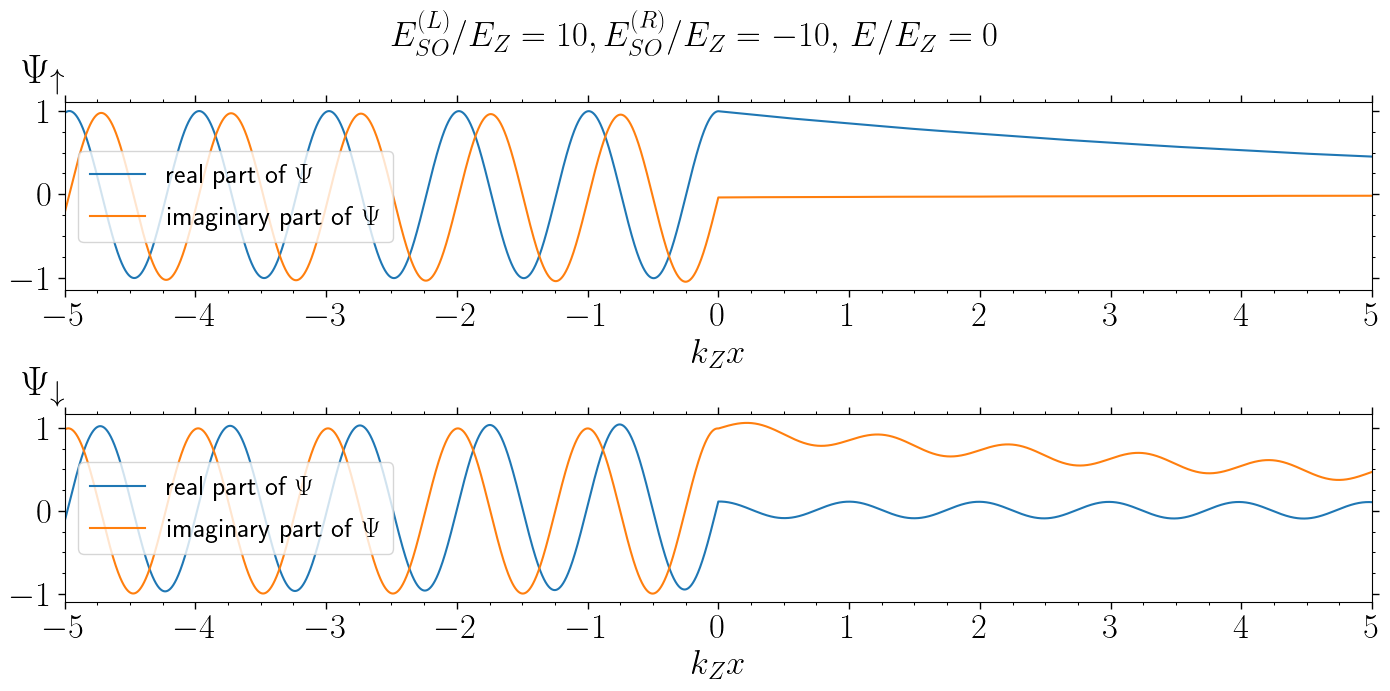

In [36]:
%matplotlib inline


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

labels_ = [r"real part of $\Psi$", 
           r"imaginary part of $\Psi$ ", 
           "evanescent mode\n real part", 
           "evanescent mode\n imaginary part"]

axs[0].plot(x_range, real_1, label=labels_[0])
axs[0].plot(x_range, imag_1, label=labels_[1])

axs[1].plot(x_range, real_2, label=labels_[0])
axs[1].plot(x_range, imag_2, label= labels_[1])

x_magior = np.array([1, 1])
x_minor = np.array([0.25, .25])
y_magior = np.array([1, 1])
y_minor = np.array([0.25, 0.25])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font['size'])

anchor = (1, 1.1)
y_label_pos2 = [(-.016, 1.04), (-.016, 1.04)]
y_label2 = [r"$\Psi_\uparrow$", r"$\Psi_\downarrow$"]
for j, i in enumerate(axs):
    i.set_xlabel(r"$k_Z x$", fontdict=font)
    i.set_ylabel(y_label2[j], rotation=0, fontdict=font, fontsize= 30)
    i.set_xlim(-5, 5)
    i.yaxis.set_label_coords(*y_label_pos2[j])
    
    i.legend(fontsize = 20)#, bbox_to_anchor=anchor)
#     i.grid(True)

    
fig.suptitle(fr"$$E_{{SO}}^{{(L)}}/E_Z= {Eso_profile[0]},  E_{{SO}}^{{(R)}}/E_Z={Eso_profile[1]}, \, E/E_Z = {ee}$$", fontsize=25)
# print(f"E_SO^(L)/E_Z= {Eso_profile[0]},  E_SO^(R)/E_Z={Eso_profile[1]},  E/E_Z = {ee}")

# SAVE = True
SAVE = False

save_path = BASE_PATH+"wavefuncton_Dirac_paradox_single_interface.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Figure 2

### T vs E at constant $E_{so,L}/E_{so,R} = 0.8$ and parameters $E_Z/E_{so,R}=0.5,3,5 $

In [7]:
# E_so,L/E_so,R
alp_l_to_alp_r = 0.8
E_SO_R = 10
Eso_profile = [-1, 1]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[0] = alp_l_to_alp_r / par
    junction[1] = 1/par
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef

# par: E_z/E_so,R
E_z_to_alpha_l = np.array([0.5, 3, 5])
for t in E_z_to_alpha_l:
    print(alp_l_to_alp_r / t, 1 / t)

# x: E/E_z
enn = np.arange(-1.7562, 16, 0.0011)
trasmission_coeff_total = make_grid(enn, E_z_to_alpha_l, [g])

1.6 2.0
0.26666666666666666 0.3333333333333333
0.16 0.2
In Weak Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7562, par=3.0
In Weak Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7550999999999999, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7539999999999998, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7528999999999997, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7517999999999996, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7506999999999995, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7495999999999994, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7484999999999993, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7473999999999992, par=3.0
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.746299999999999, par=3

In Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7562, par=5.0
In Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7550999999999999, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7539999999999998, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7528999999999997, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7517999999999996, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7506999999999995, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7495999999999994, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7484999999999993, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7473999999999992, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.746299999999999, par=5.0
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.745199999999999, par=5.0
In Zeeman reg

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2611999999999546, par=5.0
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2600999999999545, par=5.0
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2589999999999544, par=5.0
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2578999999999543, par=5.0
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2567999999999542, par

<IPython.core.display.Javascript object>


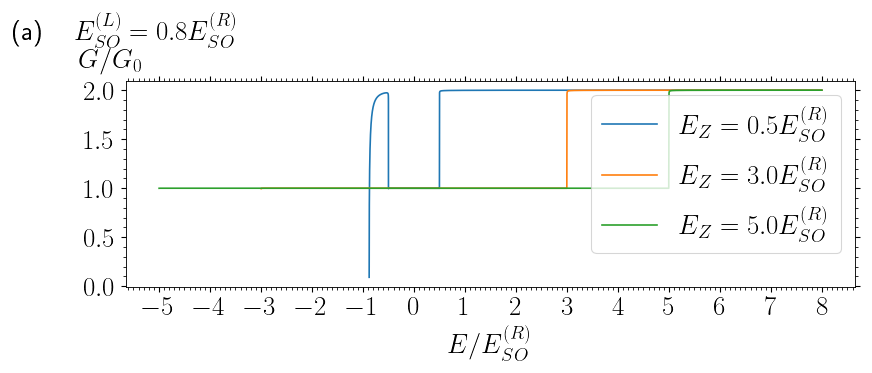

plots/tesi/3_Transport_poroperties_RNW/py/fig_2a.pdf


In [8]:
# %matplotlib inline
# %matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

line_label = r"$$ E_Z = {0} E_{{SO}}^{{(R)}}$$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():
    indd = np.where(k*enn<8)[0]
    # map E/E_z -> E/E_so,R
    axs.plot(k*enn[:indd[-1]+1], trasmission_coeff_total[k][0][indd],
                  label=fr"$$ E_Z = {k} E_{{SO}}^{{(R)}}$$")


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(r"$$ E/E_{SO}^{(R)}$$", fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

axs.text(0, 1.25, region_lbl[0]+r"\hspace{1cm}$E_{SO}^{(L)} = 0.8 E_{SO}^{(R)}$",
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs.transAxes, 
            fontdict=font)

# SAVE = True
SAVE = False

save_path = BASE_PATH+"fig_2a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

### T vs E at constant $E_{so,L}/E_{so,R} = -0.8$ and parameters $E_Z/E_{so,R}=0.5,3,5 $

In [9]:
alp_l_to_alp_r = -0.8
E_SO_R = 10
Eso_profile = [-1, 1]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[0] = alp_l_to_alp_r / par
    junction[1] = 1/par
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef


E_z_to_alpha_l = [0.5, 3, 5]
for t in E_z_to_alpha_l:
    print(alp_l_to_alp_r / t, 1 / t)

enn = np.arange(-1.7562, 16, 0.0011)
trasmission_coeff_total = make_grid(enn, E_z_to_alpha_l, [g])

-1.6 2.0
-0.26666666666666666 0.3333333333333333
-0.16 0.2
In Weak Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7562, par=3
In Weak Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7550999999999999, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7539999999999998, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7528999999999997, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7517999999999996, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7506999999999995, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7495999999999994, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7484999999999993, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.7473999999999992, par=3
In Weak Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.08 x=-1.746299999999999, par=3
In Weak Zeeman

In Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7562, par=5
In Zeeman regime E = -1.76 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7550999999999999, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7539999999999998, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7528999999999997, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7517999999999996, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7506999999999995, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7495999999999994, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7484999999999993, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.7473999999999992, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.746299999999999, par=5
In Zeeman regime E = -1.75 < -Eso (1 + (Ez/2Eso)^2) = -1.45 x=-1.745199999999999, par=5
In Zeeman regime E = -1.74 < -Eso (

<IPython.core.display.Javascript object>


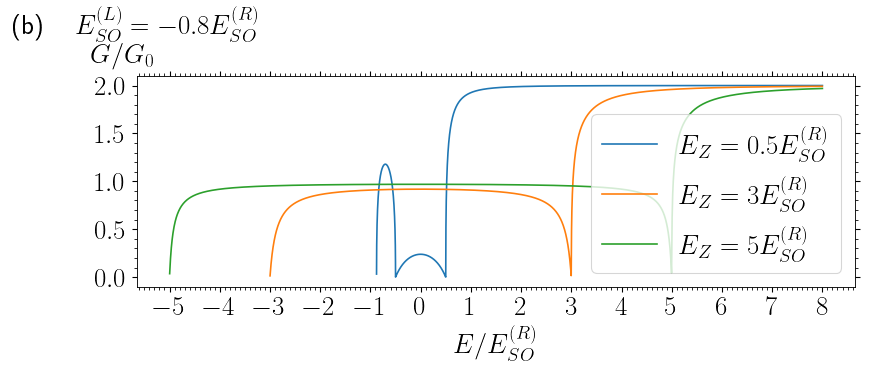

plots/tesi/3_Transport_poroperties_RNW/py/fig_2b.pdf


In [11]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

line_label = r"$$ E_Z = {0} E_{{SO}}^{{(R)}}$$"


k = list(trasmission_coeff_total.keys())
n = 0
for k in trasmission_coeff_total.keys():
    indd = np.where(k*enn<8)[0]
    axs.plot(k*enn[:indd[-1]+1], trasmission_coeff_total[k][0][indd],
                  label=fr"$$ E_Z = {k} E_{{SO}}^{{(R)}}$$")


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(r"$$ E/E_{SO}^{(R)}$$", fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)# , loc = 'top'
axs.yaxis.set_label_coords(*y_label_pos[0])
        
x_magior = np.array([[1]])
x_minor = np.array([[0.1]])

y_magior = np.array([[0.5]])
y_minor = np.array([[0.1]])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
      
axs.text(0, 1.25, region_lbl[1]+r"\hspace{1cm}$E_{SO}^{(L)} = -0.8 E_{SO}^{(R)}$",
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs.transAxes, 
            fontdict=font)
# SAVE = True
SAVE = False

save_path = BASE_PATH+"fig_2b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

# 2 interfaces

## Lead Model $0 | \alpha | 0$

In [12]:
D_SO = [6.4, 6.64, 6.88, 7.12]
D_Z = 12.8

for eso in D_SO:
    
    print(f"kso*d = {eso} Eso/EZ = {eso**2/ (D_Z)}")


kso*d = 6.4 Eso/EZ = 3.2000000000000006
kso*d = 6.64 Eso/EZ = 3.4444999999999997
kso*d = 6.88 Eso/EZ = 3.6979999999999995
kso*d = 7.12 Eso/EZ = 3.9605


In [13]:
BASE_PATH = "plots/paper_plots_2/fig1.4_Corrections/"

### T vs $E$ for fixed $E_{so}$, $d$

In [15]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] / np.sqrt(np.abs(par[1]))/2
    junction.interface[1] = par[0] / np.sqrt(np.abs(par[1]))/2
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef

# param (k_so, E_so/E_z)
param = [(0.3, 0.1), (0.3, 0.4), (0.3, 10), 
         (1, 0.1), (1, 0.4), (1, 10),
        (6, 0.1), (6, 0.4), (6, 10)]

en = np.arange(-.99, 2, 0.011)
trasmission_coeff_total = make_grid(en, param, [g])

<IPython.core.display.Javascript object>


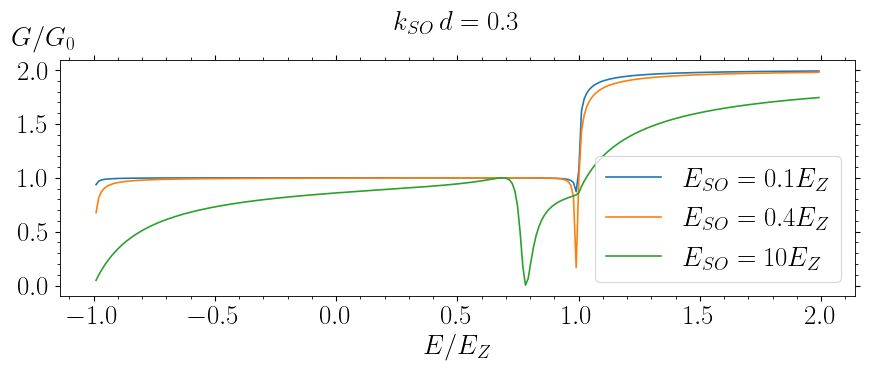

0.3 0.9486832980505138 0.03
0.3 0.4743416490252569 0.12
0.3 0.09486832980505137 3.0
plots/paper_plots_2/fig1.4_Corrections/1_T(E)_for_k=0.3kso(0|alpha|0).pdf


In [19]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())
for k in k_list[:3]:
    print(k[0], k[0]/ np.sqrt(np.abs(k[1])), k[0] * np.abs(k[1]))

    if k[1] == 1:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$$ E_{{SO}} = E_Z$$")
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z$$")


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
# axs.yaxis.set_label_coords(-.04, 1)


x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

i = 0
plt.title(r"$k_{SO} \, d = "+f"{k_list[i][0]}$", 
              fontsize = 25, x=0.5, y=1.1)
# SAVE = True
SAVE = False

save_path = BASE_PATH+f"1_T(E)_for_k={k_list[i][0]}kso(0|alpha|0).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


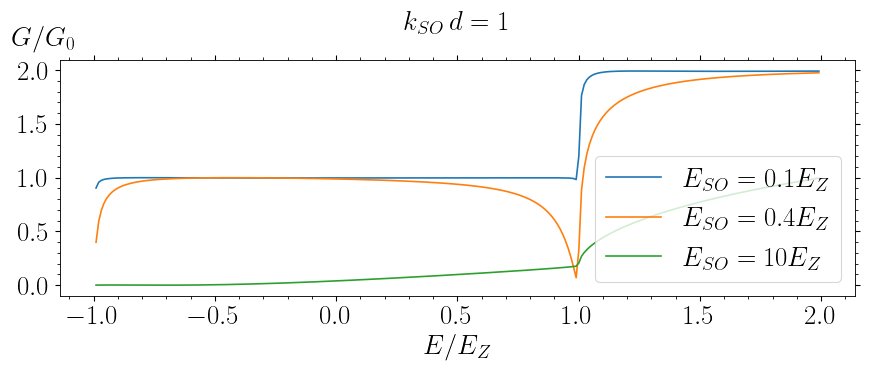

1 3.162277660168379 0.1
1 1.5811388300841895 0.4
1 0.31622776601683794 10
plots/paper_plots_2/fig1.4_Corrections/1_T(E)_for_k=1kso(0|alpha|0).pdf


In [21]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


k_list = list(trasmission_coeff_total.keys())
for k in k_list[3:6]:
    print(k[0], k[0]/ np.sqrt(np.abs(k[1])), k[0] * np.abs(k[1]))


    if k[1] == 1:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$$ E_{{SO}} = E_Z$$")
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z$$")


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

i = 3
plt.title(r"$k_{SO} \, d = "+f"{k_list[i][0]}$", 
              fontsize = 25, x=0.5, y=1.1)
# SAVE = True
SAVE = False

save_path = BASE_PATH+f"1_T(E)_for_k={k_list[i][0]}kso(0|alpha|0).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


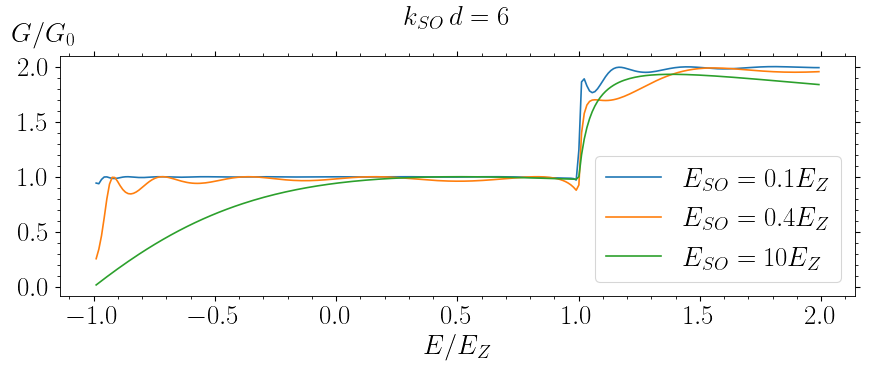

6 18.973665961010276 0.6000000000000001
6 9.486832980505138 2.4000000000000004
6 1.8973665961010275 60
plots/paper_plots_2/fig1.4_Corrections/1_T(E)_for_k=6kso(0|alpha|0).pdf


In [22]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


k_list = list(trasmission_coeff_total.keys())
for k in k_list[6:]:
    print(k[0], k[0]/ np.sqrt(np.abs(k[1])), k[0] * np.abs(k[1]))


    if k[1] == 1:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$$ E_{{SO}} = E_Z$$")
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}} = {k[1]}  E_Z$$")


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

i = 6
plt.title(r"$k_{SO} \, d = "+f"{k_list[i][0]}$", 
              fontsize = 25, x=0.5, y=1.1)
# SAVE = True
SAVE = False

save_path = BASE_PATH+f"1_T(E)_for_k={k_list[i][0]}kso(0|alpha|0).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

## gap $\alpha_l| 0 | \alpha_r$, right Rashba dominated $E_{so, R} \gg h_\perp$

### T vs $E$ for fixed $E_{so}^{(R)} = 3 E_Z$, $d = 0.3 k_Z , \ k_Z, \ 6 k_Z$

In [24]:
alp_r = 3
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[0] = par[1]
    junction.interface[0] = -par[0]/2
    junction.interface[1] = par[0]/2
        
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: {x}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef

rap = 0.5
# param: (k_z, E_so,L/E_z)
param = [(0.3, rap*alp_r), (0.3, -rap*alp_r), 
         (1, rap*alp_r), (1, -rap*alp_r),
        (6, rap*alp_r), (6, -rap*alp_r)]

en = np.arange(-2, 2, 0.011)
trasmission_coeff_total = make_grid(en, param, [g])

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(0.3, 1.5)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.989, par=(0.3, 1.5)
In Rashba dominated regime E = -1.98 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9780000000000002, par=(0.3, 1.5)
In Rashba dominated regime E = -1.97 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9670000000000003, par=(0.3, 1.5)
In Rashba dominated regime E = -1.96 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9560000000000004, par=(0.3, 1.5)
In Rashba dominated regime E = -1.95 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9450000000000005, par=(0.3, 1.5)
In Rashba dominated regime E = -1.93 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9340000000000006, par=(0.3, 1.5)
In Rashba dominated regime E = -1.92 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9230000000000007, par=(0.3, 1.5)
In Rashba dominated regime E = -1.91 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9120000000000008, par=(0.3, 1.5)
In Rashba dominated regime E = -1.90 < -Eso (1 + (Ez/2Es

In Rashba dominated regime E = -2.00 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-2.0, par=(1, -1.5)
In Rashba dominated regime E = -1.99 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.989, par=(1, -1.5)
In Rashba dominated regime E = -1.98 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9780000000000002, par=(1, -1.5)
In Rashba dominated regime E = -1.97 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9670000000000003, par=(1, -1.5)
In Rashba dominated regime E = -1.96 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9560000000000004, par=(1, -1.5)
In Rashba dominated regime E = -1.95 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9450000000000005, par=(1, -1.5)
In Rashba dominated regime E = -1.93 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9340000000000006, par=(1, -1.5)
In Rashba dominated regime E = -1.92 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9230000000000007, par=(1, -1.5)
In Rashba dominated regime E = -1.91 < -Eso (1 + (Ez/2Eso)^2) = -1.67 x=-1.9120000000000008, par=(1, -1.5)
In Rashba dominated regime E = -1.90 < -Eso (1 + (Ez/2Eso)^2) = -

<IPython.core.display.Javascript object>


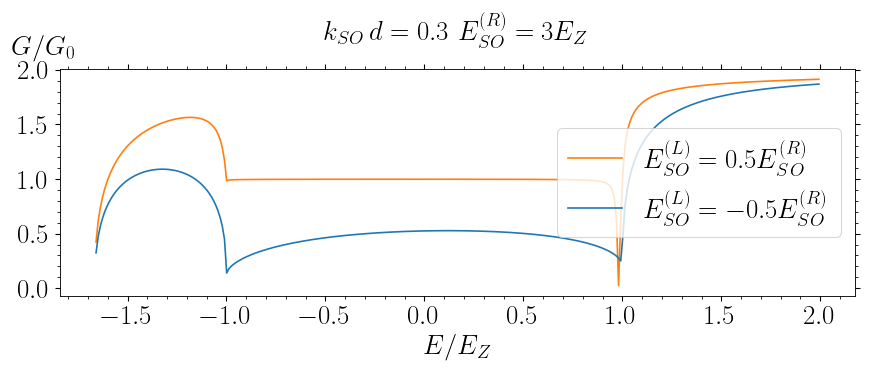

0.3 1.5
0.3 -1.5
plots/paper_plots_2/fig1.4_Corrections/2_T(E)_for_k=0.3kZ_E_(so,R)=3EZ.pdf


In [27]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


color_dict = {0.5: "#ff7f0e", -0.5: "#1f77b4"}

k_list = list(trasmission_coeff_total.keys())
for k in k_list[0:2]:
    print(k[0], k[1])
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}}^{{(L)}} = {round(k[1]/alp_r, 4)}  E_{{SO}}^{{(R)}} $$",
                    color=color_dict[k[1]/alp_r])


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

i = 0
plt.title(r"$k_{SO} \, d = "+f"{k_list[i][0]}"+r" \ E_{SO}^{(R)} = "f"{alp_r}"" E_Z$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False


save_path = BASE_PATH+f"2_T(E)_for_k={k_list[i][0]}kZ_E_(so,R)=3EZ.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


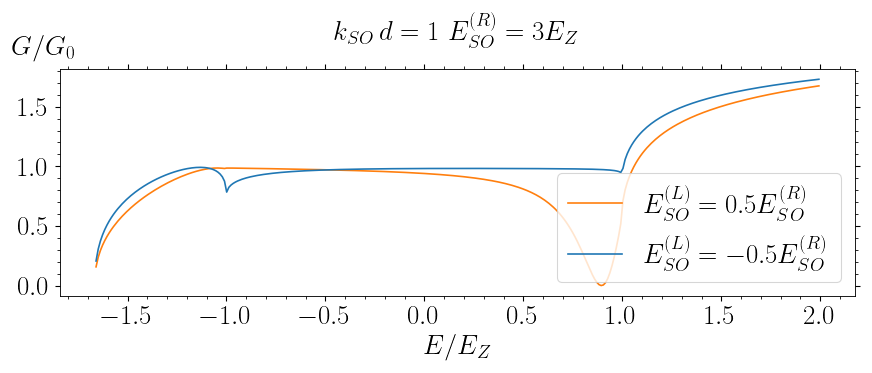

1
1
plots/paper_plots_2/fig1.4_Corrections/2_T(E)_for_k=1kZ_E_(so,R)=3EZ.pdf


In [29]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


k_list = list(trasmission_coeff_total.keys())
for k in k_list[2:4]:
    print(k[0])

    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}}^{{(L)}} = {round(k[1]/alp_r, 4)}  E_{{SO}}^{{(R)}} $$",
                    color=color_dict[k[1]/alp_r])


axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
i = 2
plt.title(r"$k_{SO} \, d = "+f"{k_list[i][0]}"+r" \ E_{SO}^{(R)} = "f"{alp_r}"" E_Z$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False


save_path = BASE_PATH+f"2_T(E)_for_k={k_list[i][0]}kZ_E_(so,R)=3EZ.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


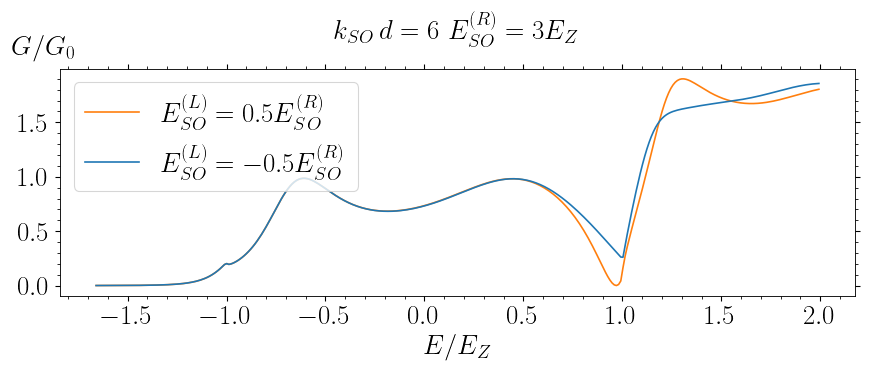

6
6
plots/paper_plots_2/fig1.4_Corrections/2_T(E)_for_k=6kZ_E_(so,R)=3EZ.pdf


In [30]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(14, 6), dpi=100, tight_layout=True, facecolor='white')


k_list = list(trasmission_coeff_total.keys())
for k in k_list[4:]:
    print(k[0])

    axs.plot(en, trasmission_coeff_total[k][0],
                   label=fr"$$ E_{{SO}}^{{(L)}} = {round(k[1]/alp_r, 4)}  E_{{SO}}^{{(R)}} $$",
                    color=color_dict[k[1]/alp_r])

    
    
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label, fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])
i = 4
plt.title(r"$k_{SO} \, d = "+f"{k_list[i][0]}"+r" \ E_{SO}^{(R)} = "f"{alp_r}"" E_Z$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False


save_path = BASE_PATH+f"2_T(E)_for_k={k_list[i][0]}kZ_E_(so,R)=3EZ.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

# Dirac paradox

In [31]:
ev_to_j = 1.602176634e-19
#InSb
m = 0.015*cc.m_e

h_xy = 0.1e-3# eV

k_z = np.sqrt(2*m*h_xy*ev_to_j)/cc.hbar# 1/Metr
l_z = 1/k_z
print(f"k_z {k_z}") #1/Metr
print(f"l_z {l_z}m")
print(f"l_z {l_z*10**9:.2f}nm") #Metr

k_z 6274572.777578377
l_z 1.5937340046057163e-07m
l_z 159.37nm


In [32]:
L = 100e-9#m

E_l  = np.pi**2*cc.hbar**2/(2*m*L**2)/ev_to_j


print(E_l, E_l*1e3)

print(k_z * L)
print(np.pi*np.sqrt(h_xy/E_l), np.sqrt(h_xy/E_l))

0.0025068677507782506 2.5068677507782504
0.6274572777578377
0.6274572777578377 0.19972585466828846


##  Fig 4.5 $T vs E_{so}$

In [33]:
alp_r = 10
Eso_profile = [alp_r, 0, -alp_r]
x_profile = [-.31, .31]
junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(ee, par):
    junction[0] = ee/par
    junction[2] = -ee/par 
    junction.interface = [0, np.pi*np.sqrt(par/E_l)]
    
    S = junction.get_scattering_matrix(0)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}, {ee/par}")
        return np.nan
    else:
        return S.t_coef
    
h_p = np.array([0.1, .05, .01, .005])*1e-3

eso = np.arange(0.001, 10, 0.0011)*1e-3

res = make_grid(eso, h_p, [g])

<IPython.core.display.Javascript object>


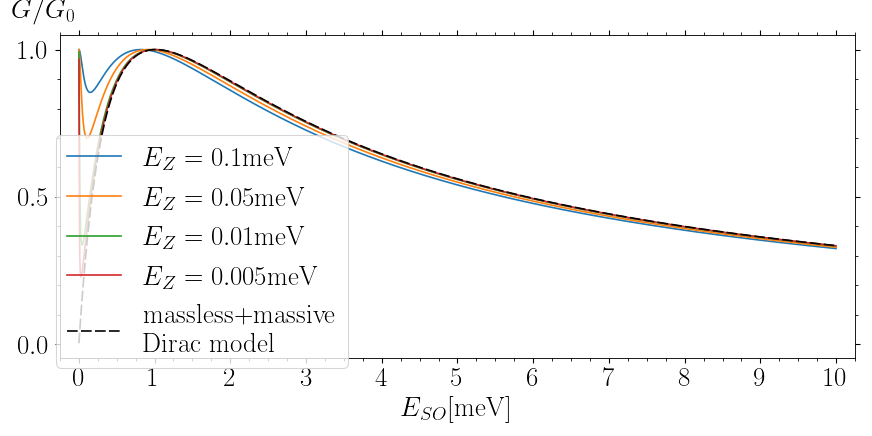

plots/paper_plots_2/fig1.4_Corrections/T_vs_E_so(expansion)a.pdf


In [34]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
color_cycle = plt.rcParams['axes.prop_cycle']()


fig, axs = plt.subplots(1, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

exp_label = "massless+massive\nDirac model"


for j, k in enumerate(res.keys()):
    axs.plot(eso*1e3, res[k][0], label=fr"$E_Z = {k*1e3}$""meV", **next(color_cycle))

    
axs.plot(eso*1e3, [expansion2(e) for e in eso], 
            label=exp_label, 
            dashes=[6.5, 2],
#             linestyle='dashed', 
            color = 'black')



axs.set_xlabel(r"$E_{SO}$""[meV]", fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.25])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

from matplotlib import ticker
i = 0
anchor = (0.38, 0.33)
lines_labels = axs.get_legend_handles_labels()
leg = axs.legend(*lines_labels, 
                        loc=7, 
                        bbox_to_anchor=anchor, 
                        prop={'family': 'Times New Roman', 'size': legend_font_size})
# t1, t2, t3 = leg.get_texts()
t1 = leg.get_texts()
# here we create the distinct instance
t1[-1]._fontproperties = t1[0]._fontproperties.copy()
t1[-1].set_size(legend_font_size)

axs.set_xlim(-0.25, 10.25)

# SAVE = True
SAVE = False


save_path = BASE_PATH+"T_vs_E_so(expansion)a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()


<IPython.core.display.Javascript object>


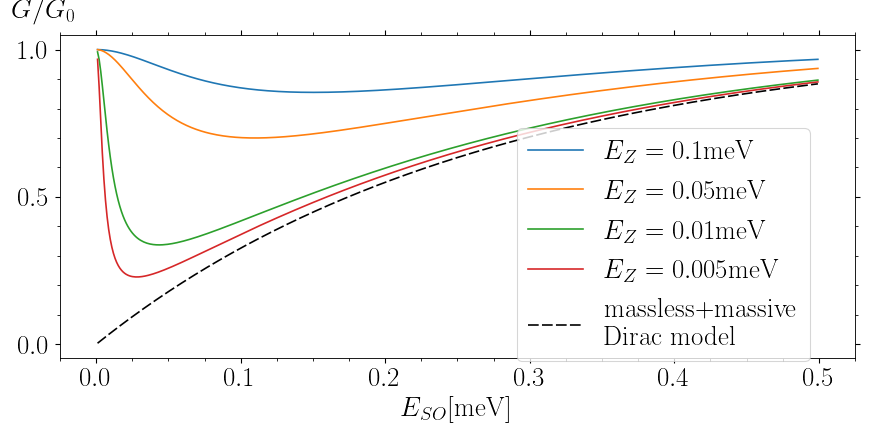

plots/paper_plots_2/fig1.4_Corrections/T_vs_E_so(expansion)b.pdf


In [35]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
color_cycle = plt.rcParams['axes.prop_cycle']()


fig, axs = plt.subplots(1, 1, figsize=(14, 7), dpi=100, tight_layout=True, facecolor='white')

exp_label = "massless+massive\nDirac model"

ind, = np.where(np.isclose(0.5, eso*1e3, rtol = 1e-3))[0]
for j, k in enumerate(res.keys()):
    axs.plot((eso*1e3)[:ind], res[k][0][:ind], label=fr"$E_Z = {k*1e3}$""meV")

axs.plot((eso*1e3)[:ind], [expansion2(e) for e in eso[:ind]], 
            label=exp_label, 
            dashes=[6.5, 2],
            color = 'black')

axs.set_xlabel(r"$E_{SO}$""[meV]", fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.1])
x_minor = np.array([0.025])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

from matplotlib import ticker
i = 0
anchor = (0.96, 0.35)
lines_labels = axs.get_legend_handles_labels()
leg = axs.legend(*lines_labels, 
                        loc=7, 
                        bbox_to_anchor=anchor, 
                        prop={'family': 'Times New Roman', 'size': legend_font_size})
# t1, t2, t3 = leg.get_texts()
t1 = leg.get_texts()
# here we create the distinct instance
t1[-1]._fontproperties = t1[0]._fontproperties.copy()
t1[-1].set_size(legend_font_size)

    
axs.set_xlim(-0.025, 0.525)

# SAVE = True
SAVE = False


save_path = BASE_PATH+"T_vs_E_so(expansion)b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()

## Fig 4.4 $T vs k_{SO} d$

<IPython.core.display.Javascript object>


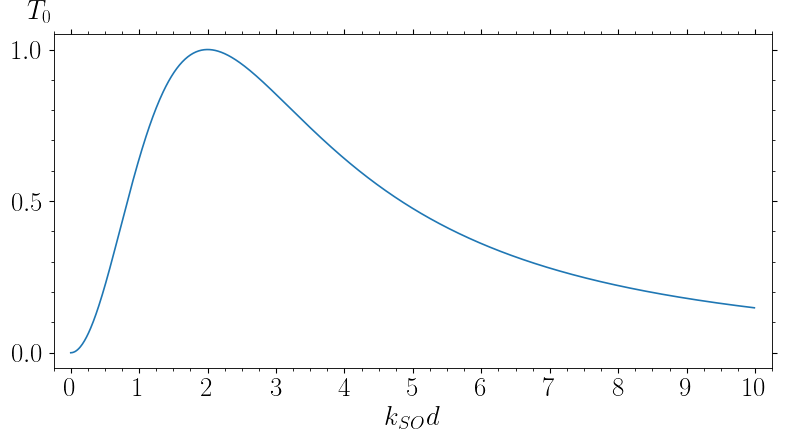

plots/paper_plots_2/fig1.4_Corrections/transmission_coefficient.pdf


In [36]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'

# (14, 7)
fig, axs = plt.subplots(1, 1, figsize=(10, 5.6), dpi=100, tight_layout=True, facecolor='white')


axs.plot(np.arange(0, 10, 0.01), [expansion(e) for e in np.arange(0, 10, 0.01)])#, linestyle='dashedl')


x_magior = np.array([1])
x_minor = np.array([0.25])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


axs.set_xlabel(r"$k_{SO} d$", fontdict=font)
# axs.set_ylabel(y_label[0], rotation=0, fontdict=font)
axs.set_ylabel(r"$T_0$", rotation=0, fontdict=font)
axs.yaxis.set_label_coords(*y_label_pos[0])
    
axs.set_xlim(-0.25, 10.25)

# SAVE = True
SAVE = False


save_path = BASE_PATH+"transmission_coefficient.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')
plt.show()